In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Reviews.csv',nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [3]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [4]:
#!pip install textblob

In [5]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', ' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

ModuleNotFoundError: No module named 'textblob'

In [ ]:
reviews =df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [6]:
score_1=reviews[reviews['Score']==1].sample(n=18)
score_2=reviews[reviews['Score']==2].sample(n=18)
score_3=reviews[reviews['Score']==3].sample(n=18)
score_4=reviews[reviews['Score']==4].sample(n=18)
score_5=reviews[reviews['Score']==5].sample(n=18)

NameError: name 'reviews' is not defined

In [7]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

NameError: name 'score_1' is not defined

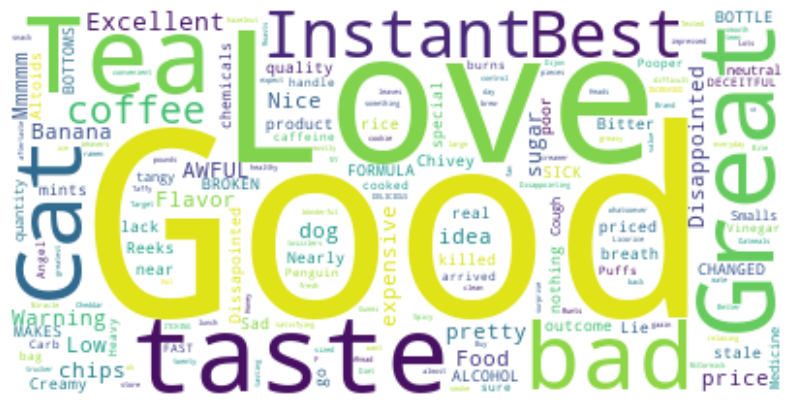

In [14]:
from wordcloud import WordCloud
reviews_str=" ".join(reviews_sample['Summary'].to_numpy())
wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]
negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=negative_reviews.Summary.str.cat()

NameError: name 'reviews_sample' is not defined

In [9]:
!pip install WordCloud

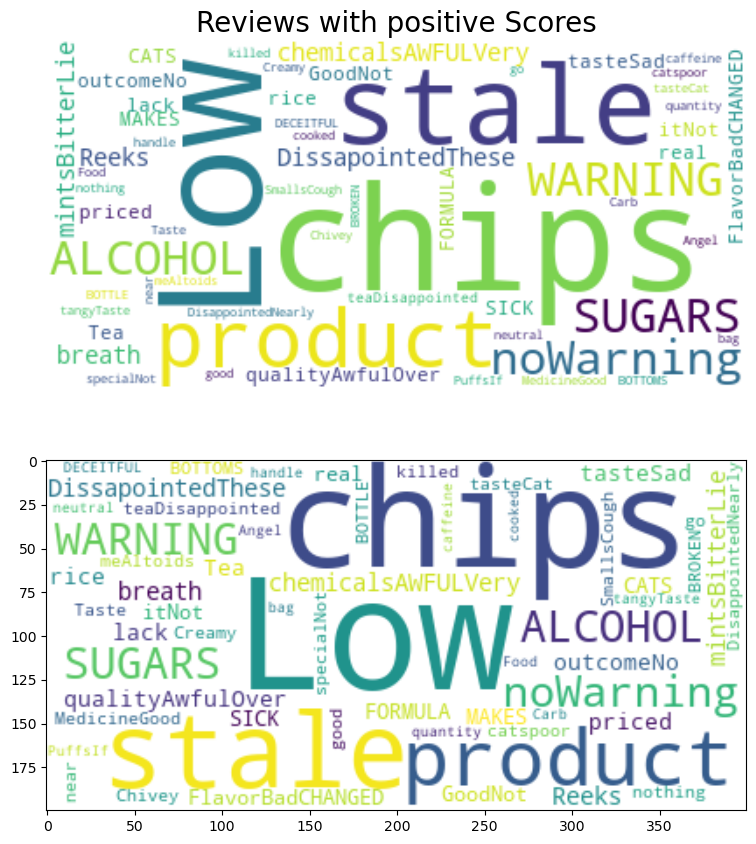

In [19]:
wordcloud_negative=WordCloud(background_color='white')\
    .generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white')\
    .generate(positive_reviews_str)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2=fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis=("off")
ax1.set_title('Reviews with positive Scores',fontsize=20)
plt.show()

In [10]:
!pip install vaderSentiment

In [21]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer=SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [22]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.134,0.602,0.264,0.7880
3,0.000,0.854,0.146,0.4404
4,0.000,0.455,0.545,0.9186


In [25]:
df_c=pd.concat([df.reset_index(drop=True),df_sentiments],axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanut p...,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880


In [26]:
df_c['Sentiment']=np.where(df_c['compound']>=0,'positive','Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanut p...,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",connection around century light pillow city ge...,0.134,0.602,0.264,0.7880,positive


positive    459
Negative     41
Name: Sentiment, dtype: int64


<Axes: >

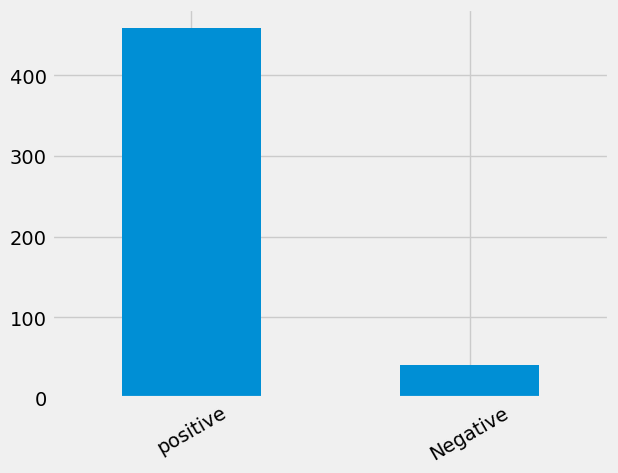

In [27]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar',rot=30)

In [11]:
!pip install emot

In [12]:
text1="What are you saying😂.I am the boss😎,and why are you so😏"

In [14]:
import re
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import UNICODE_EMOJI

In [15]:

def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
converting_emojis(text1)

'What are you sayingface_with_tears_of_joy.I am the bosssmiling_face_with_sunglasses,and why are you sosmirking_face'

In [16]:
def emoji_removal(string):
    emoji_unicodes = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_unicodes.sub(r'', string)
emoji_removal(text1)

'What are you saying.I am the boss,and why are you so'